TWEETER SENTIMENT

1. BUSINESS UNDERSTANDING
   
   OVERVIEW

Chemami Ent. is a platform that focuses on analyzing customer feedbacks on products by various brands. this gives an opportunity to brands to learn what makes customers happy or un unhappy about their products, so that they can tailor products to meet their customers' needs.
Apple offers a diverse range of products, including hardware devices, software and services that are diverse.Their products range from the iconic iPhone and Mac computers to wearables like the Apple watch and a suite of services that are convinient. This has made Apple company to be a global technology leder, synonymous with innovation, design, excellence and pushing boundaries in the world of consumer electronics.

In [40]:
!pip install nltk
# import important modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [41]:
df = pd.read_csv(r'c:\Users\Margaret Mitey\OneDrive\Documents\judge_1377884607_tweet_product_company.csv')

In [42]:
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [43]:
df.shape

(8721, 3)

In [44]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [45]:
#Renaming the columns
df = df.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
df.head()

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [46]:
#Simplify sentiment labels 
dict_sent = {'No emotion toward brand or product':"No emotion", 
             'Positive emotion':'Positive emotion',
             'Negative emotion':'Negative emotion',
             "I can't tell": "I can't tell"}
df['Sentiment'] = df['Sentiment'].map(dict_sent)

In [47]:
df["Sentiment"].value_counts()

No emotion          5156
Positive emotion    2869
Negative emotion     545
I can't tell         151
Name: Sentiment, dtype: int64

In [48]:
# check missing values in data
df.isnull().sum()

Tweet           1
Product      5552
Sentiment       0
dtype: int64

In [49]:
# Print the value count of product and sentiment column
print(df['Product'].value_counts())
print(("-"*40))
print(df['Sentiment'].value_counts())

iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: Product, dtype: int64
----------------------------------------
No emotion          5156
Positive emotion    2869
Negative emotion     545
I can't tell         151
Name: Sentiment, dtype: int64


In [50]:
# Check for duplicated rows
print('Total duplicated rows')
print(df.duplicated().sum())
print(("-"*40))

# Check for null values
print('Total null values')
print(df.isna().sum())

Total duplicated rows
22
----------------------------------------
Total null values
Tweet           1
Product      5552
Sentiment       0
dtype: int64


In [51]:
#Dropping duplicates
df.drop_duplicates(inplace=True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion
8718,"Google's Zeiger, a physician never reported po...",NaN,No emotion
8719,Some Verizon iPhone customers complained their...,NaN,No emotion


In [52]:
#Fills NaN's with "Undefined" to help with data visualizations
df['Product'].fillna("Undefined", inplace = True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your re...",Undefined,No emotion
8718,"Google's Zeiger, a physician never reported po...",Undefined,No emotion
8719,Some Verizon iPhone customers complained their...,Undefined,No emotion


In [53]:
df = df[df['Sentiment'] != "I can't tell"]

In [54]:
# Print the value count of product and sentiment column
print(df['Product'].value_counts())
print(("-"*40))
print(df['Sentiment'].value_counts())

Undefined                          5397
iPad                                905
Apple                               636
iPad or iPhone App                  450
Google                              409
iPhone                              286
Other Google product or service     281
Android App                          77
Android                              73
Other Apple product or service       34
Name: Product, dtype: int64
----------------------------------------
No emotion          5143
Positive emotion    2861
Negative emotion     544
Name: Sentiment, dtype: int64


In [55]:
#Visual of sentiment distribution of products
df["Product"].fillna("none", inplace = True)
df_none = df.loc[df["Product"] == 'none']

apple_condition = (df['Product'] == "iPad") | (df['Product'] == "iPad or iPhone App") | (df['Product'] == "iPhone") | (df['Product'] == "Other Apple product or service")
google_condition = (df['Product'] == "Other Google product or service") | (df['Product'] == "Android App") | (df['Product'] == "Android") 
df.loc[apple_condition,'Product'] = "Apple"
df.loc[google_condition, 'Product'] = "Google"

# apple loop
for word in ["Apple","iphone","apple","ipad","ipad2","iPad 2","iPhone","iPad"]:
    temp_df = df_none[df_none['Tweet'].str.contains(word)]
    temp_df['Product'].replace({'none': 'Apple'}, inplace=True)
    df_none = temp_df.combine_first(df_none)
# google loop
for word in ["Google","google","Android","android"]:
    temp_df = df_none[df_none['Tweet'].str.contains(word)]
    temp_df['Product'].replace({'none': 'Google'}, inplace=True)
    df_none = temp_df.combine_first(df_none)
df_1 = df_none.combine_first(df)


C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_10656\476698990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Product"].fillna("none", inplace = True)
C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_10656\476698990.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[apple_condition,'Product'] = "Apple"
C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_10656\476698990.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [56]:
df_1 = df_1[df_1['Product'] != "none"]
df_1 = df_1[df_1['Sentiment'] != "I can't tell"]

c:\Users\Margaret Mitey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_10656\1429756318.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,500,1000,1500,2000,2500], fontsize=18)


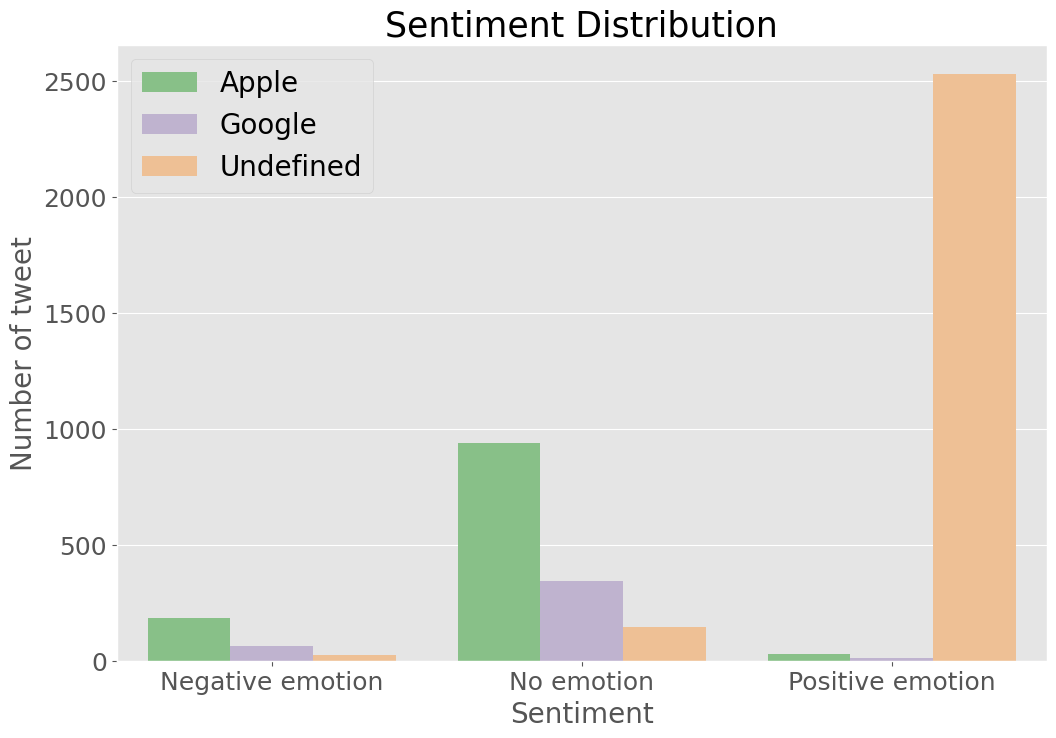

In [57]:
labels = ['Negative emotion','No emotion','Positive emotion']
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(df_1['Sentiment'], hue=df_1['Product'], palette='Accent')
plt.title('Sentiment Distribution', fontsize=25)
ax.set_yticklabels([0,500,1000,1500,2000,2500], fontsize=18)
ax.set_xticklabels(labels, fontsize=18)
plt.xlabel('Sentiment',fontsize=20)
plt.ylabel('Number of tweet',fontsize=20)
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [58]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'Product' and 'Tweet'

def find_Product(Product, Tweet):
    if pd.notna(Product) and Product == 'Undetermined':
        if pd.notna(Tweet):
            lower_tweet = Tweet.lower()  # Make tweet lowercase
            is_google = ('google' in lower_tweet) or ('android' in lower_tweet)  # Check for 'google' or 'android'
            is_apple = ('apple' in lower_tweet) or ('ip' in lower_tweet)  # Check for 'apple' or 'ip'
            if is_google:
                return 'Google'
            elif is_apple:
                return 'Apple'
    return Product

df['Product'] = df.apply(lambda x: find_Product(x['Product'], x['Tweet']), axis=1)
df['Product'].value_counts()  # Reviewing value counts of each class within 'Product'


C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_10656\1120942615.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product'] = df.apply(lambda x: find_Product(x['Product'], x['Tweet']), axis=1)


Undefined    5397
Apple        2311
Google        840
Name: Product, dtype: int64

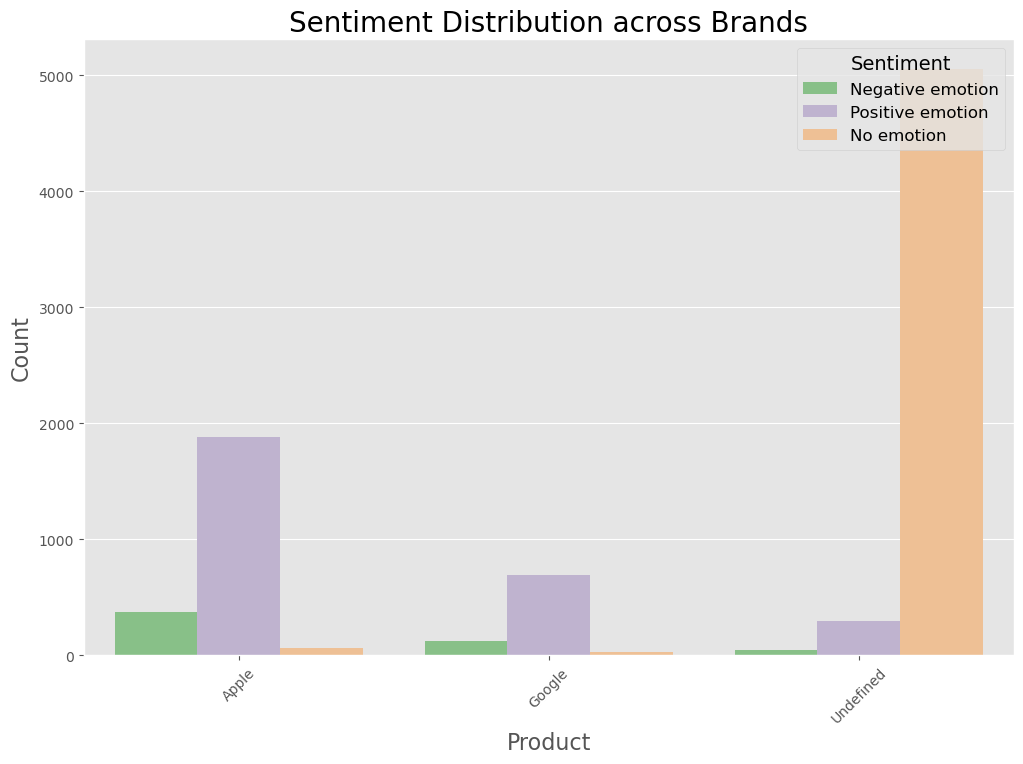

In [63]:
#count plot for Sentiment across brands
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Product", hue="Sentiment", palette="Accent")
plt.title('Sentiment Distribution across Brands', fontsize=20)
plt.xlabel('Product', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title='Sentiment', title_fontsize='14', fontsize='12', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [65]:
def countplot(df, col, hue=None, rotation=None):
    
    fig, ax = plt.subplots(figsize=(12,8))
    sns.countplot(data = df, x = col, hue = hue, order = df[col].value_counts().index)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation= rotation, fontsize = 15)
    ax.set_xlabel(xlabel = col, fontsize = 20)
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.set_ylabel(ylabel = "Number of Tweets", fontsize = 20)
    ax.set_title(f"Number of Tweets per {col}", fontsize = 30)
    plt.show()

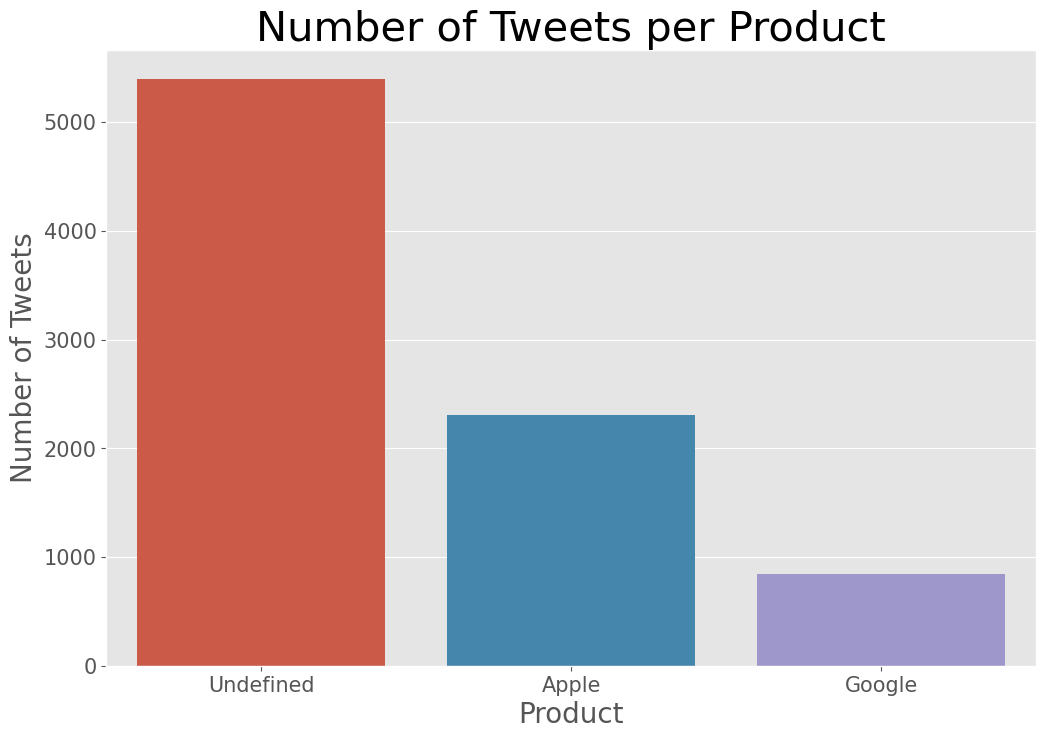

In [67]:
countplot(df, "Product")

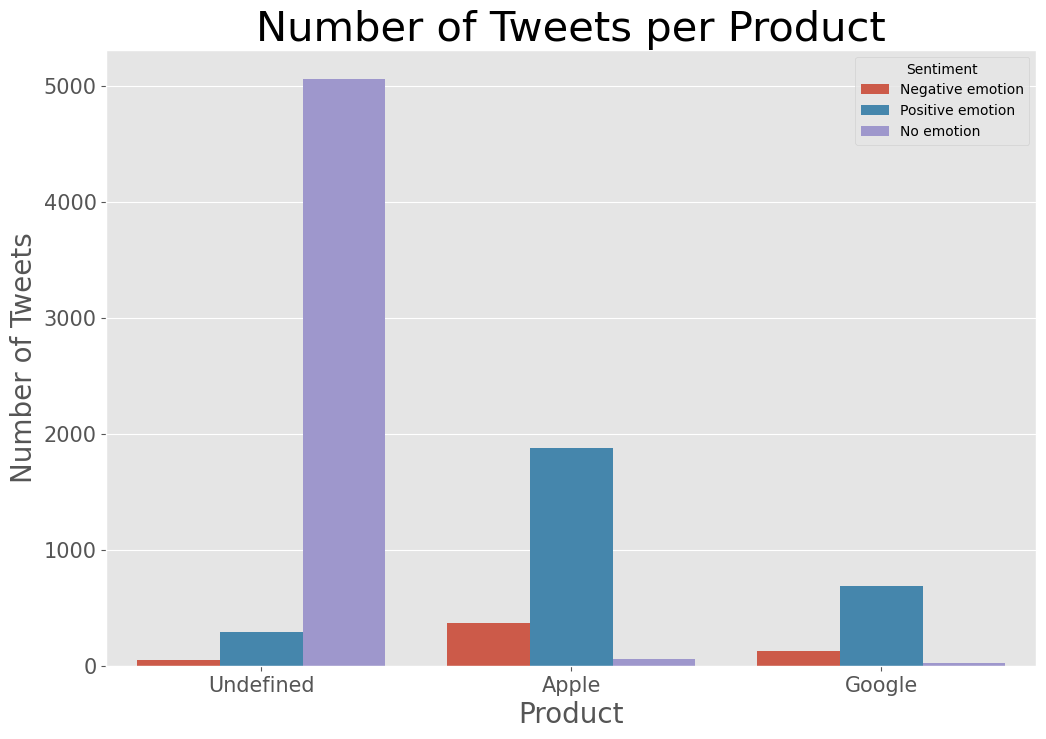

In [68]:
countplot(df, "Product", hue = "Sentiment")

In [71]:
df["Product"].value_counts()

Undefined    5397
Apple        2311
Google        840
Name: Product, dtype: int64

DATA PREPROCESSING AND FEATURE ENGINEERING

In [72]:
# function to clean text
import re
def cleaner(Tweet):
    Tweet = re.sub(r'@[A-Za-z0-9]+','', str(Tweet)) # removes @
    Tweet = re.sub(r'#', '', str(Tweet)) # removes hashtag
    Tweet = re.sub(r'RT[\s]+','', str(Tweet)) # removes RT
    Tweet = re.sub(r'https?:\/\/\S+', '', Tweet) # remove hyperlink in tweet
    Tweet = re.sub(r'[^\w\s]', '', Tweet) # removes punctuations
    #tweet = re.sub(r'[^a-zA-Z]','', tweet)
    return Tweet
df['Tweet'] = df['Tweet'].apply(cleaner)


C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_10656\3686377229.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df['Tweet'].apply(cleaner)


In [73]:
#Remove retweets, links and other characters still present
df['Tweet'] = df.Tweet.map(lambda x: re.sub('rt', " ", x)) # Remove rt (retweet)
df['Tweet'] = df.Tweet.map(lambda x: re.sub('link', " ", x))# Remove link
df['Tweet'] = df.Tweet.map(lambda x: re.sub('@', " ", x)) # Remove @
df['Tweet'] = df.Tweet.map(lambda x: re.sub('mention', " ", x)) # Remove mention 
df['Tweet'] = df.Tweet.map(lambda x: re.sub('�+', " ", x)) # remove � character

df.Tweet

C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_10656\179663055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df.Tweet.map(lambda x: re.sub('rt', " ", x)) # Remove rt (retweet)
C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_10656\179663055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df.Tweet.map(lambda x: re.sub('link', " ", x))# Remove link
C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_10656\179663055.py:4: SettingWithCopyWarning: 
A value is tryi

0        I have a 3G iPhone After 3 hrs tweeting at RI...
1        Know about   Awesome iPadiPhone app that youl...
2        Can not wait for iPad 2 also They should sale...
3        I hope this years festival isnt as crashy as ...
4        great stuff on Fri SXSW Marissa Mayer Google ...
                              ...                        
8716                               Ipad everywhere SXSW  
8717    Wave buzz We interrupt your regularly schedule...
8718    Googles Zeiger a physician never repo ed poten...
8719    Some Verizon iPhone customers complained their...
8720          ϡ_ʋҋ__Google Tests Checkin Offers At SXSW  
Name: Tweet, Length: 8548, dtype: object

In [74]:
#Tokenizaton, Stopword removal and lemmatization of the tweets.
import nltk
nltk.download('omw-1.4')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

tokenizer = RegexpTokenizer (r'\w{3,}')

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = PorterStemmer()


[nltk_data] Downloading package omw-1.4 to C:\Users\Margaret
[nltk_data]     Mitey\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [75]:
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    text = text.lower()

    # Tokenize text using `tokenizer`
    tokens =tokenizer.tokenize(text)

    # Remove stopwords using `stopwords_list`
    tokens = [token for token in tokens if token not in stopwords_list]

    # Stem the tokenized text using `stemmer`
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # Return the preprocessed text
    
    return stemmed_tokens
preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)

['exampl', 'sentenc', 'preprocess']

In [88]:
#Lemmatize
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_and_tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [lemmatizer.lemmatize(token) for token in tokens]

In [89]:

#Preprocessing the entire dataset
text_data = df['Tweet'].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
text_data


0       [iphon, hr, tweet, rise_austin, dead, need, up...
1       [know, awesom, ipadiphon, app, youll, like, ap...
2                          [wait, ipad, also, sale, sxsw]
3       [hope, year, festiv, isnt, crashi, year, iphon...
4       [great, stuff, fri, sxsw, marissa, mayer, goog...
                              ...                        
8716                              [ipad, everywher, sxsw]
8717    [wave, buzz, interrupt, regularli, schedul, sx...
8718    [googl, zeiger, physician, never, repo, potent...
8719    [verizon, iphon, custom, complain, time, fell,...
8720            [ϡ_ʋҋ__googl, test, checkin, offer, sxsw]
Name: Tweet, Length: 8548, dtype: object

Finally, models require the target variable to be of integer type, so let's assign 0 to No emotion, 1 to Negative emotion toward brand or product and 2 to Positive emotion.

In [90]:
#Reassigning sentiment values to integers
df['Sentiment'].replace({'Positive emotion': 2, 'Negative emotion': 1, 
                                 'No emotion toward brand or product': 0}, inplace=True)

C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_10656\1091878414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'].replace({'Positive emotion': 2, 'Negative emotion': 1,


     ------------------------------------ 153.3/153.3 kB 247.5 kB/s eta 0:00:00


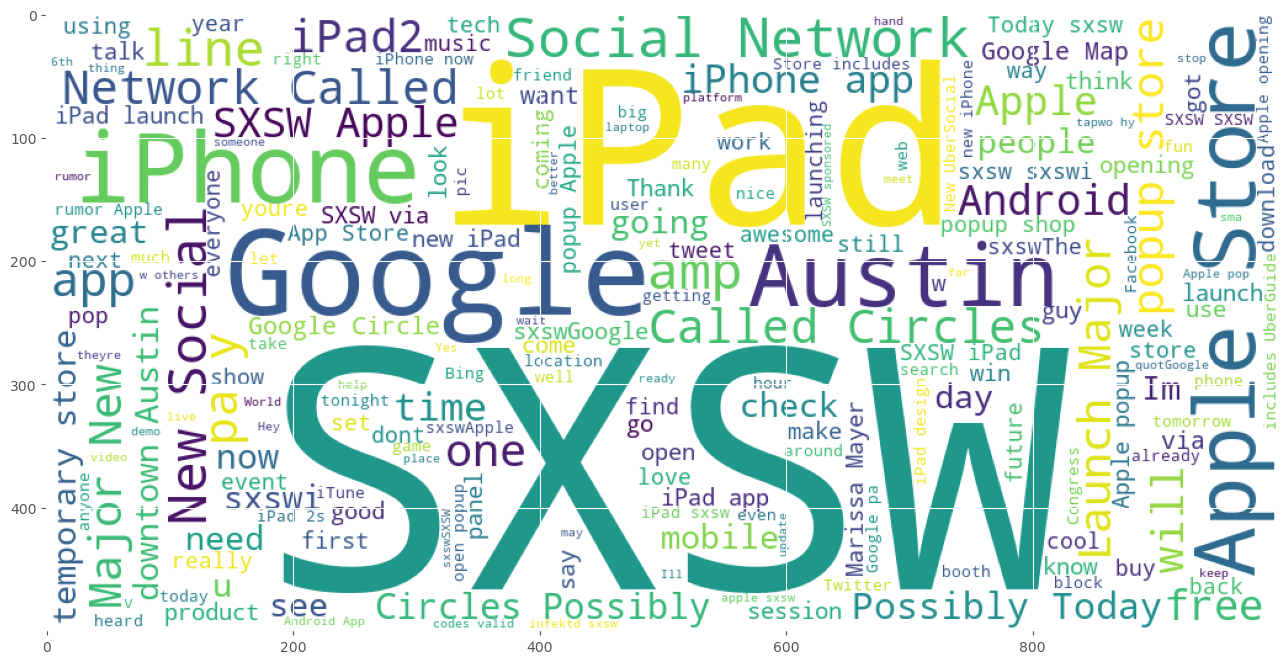

In [96]:
!pip install wordcloud
import matplotlib as mpl 
from wordcloud import WordCloud
mpl.rcParams['figure.figsize'] = 20,8
sample_data = df['Tweet']

word_cloud =" "
for row in sample_data:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud);

MODELING AND EVALUATION
The step of the project will include the following steps:

Specifying our X and y.
Spliting our data into training and testing data
Vectorizing our data using TF-IDF vectorizer
Choosing a baseline model
Tuning the selected baseline model
Our target variable will be the 'Sentiment' column and our feature variable will be the 'Tweet' column. Once specified we will proceed to split our data with the test size set at 20%.

In [98]:
#Specifying X and y
X = df['Tweet']
y = df['Sentiment']

In [100]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TfidfVectorizer with max_features
vectorizer = TfidfVectorizer(max_features=500)

# Fitting and transforming the training data
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Transforming the test data
X_test_vec = vectorizer.transform(X_test).toarray()


In [102]:
#Checking dimensions of vectorized data
X_train_vec.shape, X_test_vec.shape

((6838, 500), (1710, 500))